In [ ]:
library(tidyverse)
library(dplyr)
library(stringr)
library(readr)
library(data.table)

UBC_ISD <- fread("UBC-ISD.csv", encoding = "UTF-8")

In [18]:
UBC_ISD_text <- UBC_ISD |>
  select("twitter.tweet/text", "retweet.twitter.tweet/text") |>
  rename(text = `twitter.tweet/text`) |>
  mutate(`retweet.twitter.tweet/text` = na_if(`retweet.twitter.tweet/text`, "")) |>
  mutate(not_retweet = ifelse(is.na(`retweet.twitter.tweet/text`), 1, 0))|>
  select(text, not_retweet)

In [19]:
aggregate_proportion_rts <- (nrow(filter(UBC_ISD_text, not_retweet==0))/nrow(UBC_ISD_text))*100

In [20]:
aggregate_proportion_rts

[1] 61.67805

In [21]:
users <- c("adriandix", "AlikaMD", "AmyGreerKalisz", "angie_rasmussen", "AnnaBlakney", 
           "AntibioticDoc", "asapscience", "ASPphysician", "atRachelGilmore", "binhanv", 
           "BirinderNarang", "blackdocscanada", "BogochIsaac", "bornk", "carlyweeks", 
           "CaulfieldTim", "CDCofBC", "cdube_sante", "cfpcceo", "ChiefSciCan", "cmcovidtf", 
           "CMOH_Alberta", "CMOH_NL", "conquercovid19", "COVID_19_Canada", "COVIDSciOntario", 
           "CPHO_Canada", "ctouzin", "CTV_AvisFavaro", "DeNovo_Fatima", "deonandan", "drfisman", 
           "Dr_ChrisSimpson", "drgigiosler", "DrKaliBarrett", "drmwarner", "drsusanshaw", 
           "DrVivianS", "egpayne", "epdevilla", "ErnieHudsonPEI", "everetthindley", "First10EM", 
           "GermHunterMD", "glenpyle", "heysciencesam", "hgagneTVA", "IDEpiPhD", "imgrund", 
           "iPreetBrar", "IrfanDhalla", "j_mcelroy", "jasonfherring", "jfrketich", "jkwan_md", 
           "Johnrockdoc", "JuliaWongCBC", "juliegreenMLA", "Justin_Ling", "jyangstar", "KashPrime", 
           "KatharineSmart", "Kevin_Parent", "KindrachuckJason", "KrishanaSankar", "kwadwo777", 
           "LaurenPelley", "LisaBarrettID", "McGillOSS", "MerrimanPaul", "MichaelSchwandt", 
           "MLAStefanson", "moirawyton", "moriartylabs", "MPaiMD", "NaheedD", "NathanStall", 
           "NightShiftMD", "NoLore", "OttawaHealth", "paimadhu", "PattyHajdu", "picardonhealth", 
           "RicharLisa", "roussin_brent", "sabaeitizaz", "sabiVM", "SammyG_MD", "sarperotto", 
           "SciChefCan", "sciencemonkeyca", "ScienceUpFirst", "sdbaral", "shandro", "SharkawyMD", 
           "shazmamithani", "ShephardDorothy", "srinmurthy99", "SteiniBrown", "theresaboyle", 
           "thisisourshotca", "TorontoIDDOC", "UbakaOgbogu", "VaxHuntersCan", "VeraEtches", 
           "VikCBC", "wickdchiq", "zachchurchhill", "zchangla", "DrKathleenRoss1")


UBC_ISD_text <- UBC_ISD_text %>%
  mutate(user = str_extract(text, paste(users, collapse = "|"))) %>%
  filter(!is.na(user))

summary_data <- UBC_ISD_text %>%
  group_by(user) %>%
  summarise(
    Total_Count = n(),
    RT_Count = sum(not_retweet == 0),
    Non_RT_Count = sum(not_retweet == 1),
    rt_percentage = RT_Count / Total_Count * 100
  )


In [22]:
options(scipen=999)


tweet_counts_long <- summary_data |>
    arrange(desc(Total_Count)) |>
    mutate(user = factor(user, levels = user)) |>
    select(user, RT_Count, Non_RT_Count, Total_Count) |>
    pivot_longer(cols = c("RT_Count", "Non_RT_Count", "Total_Count"), names_to = "Type", values_to = "Count")|>
    mutate(user = factor(user, levels = summary_data$user[order(summary_data$Total_Count, decreasing = TRUE)]))|>
    filter(Type!="Total_Count")|>
    head(60)

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


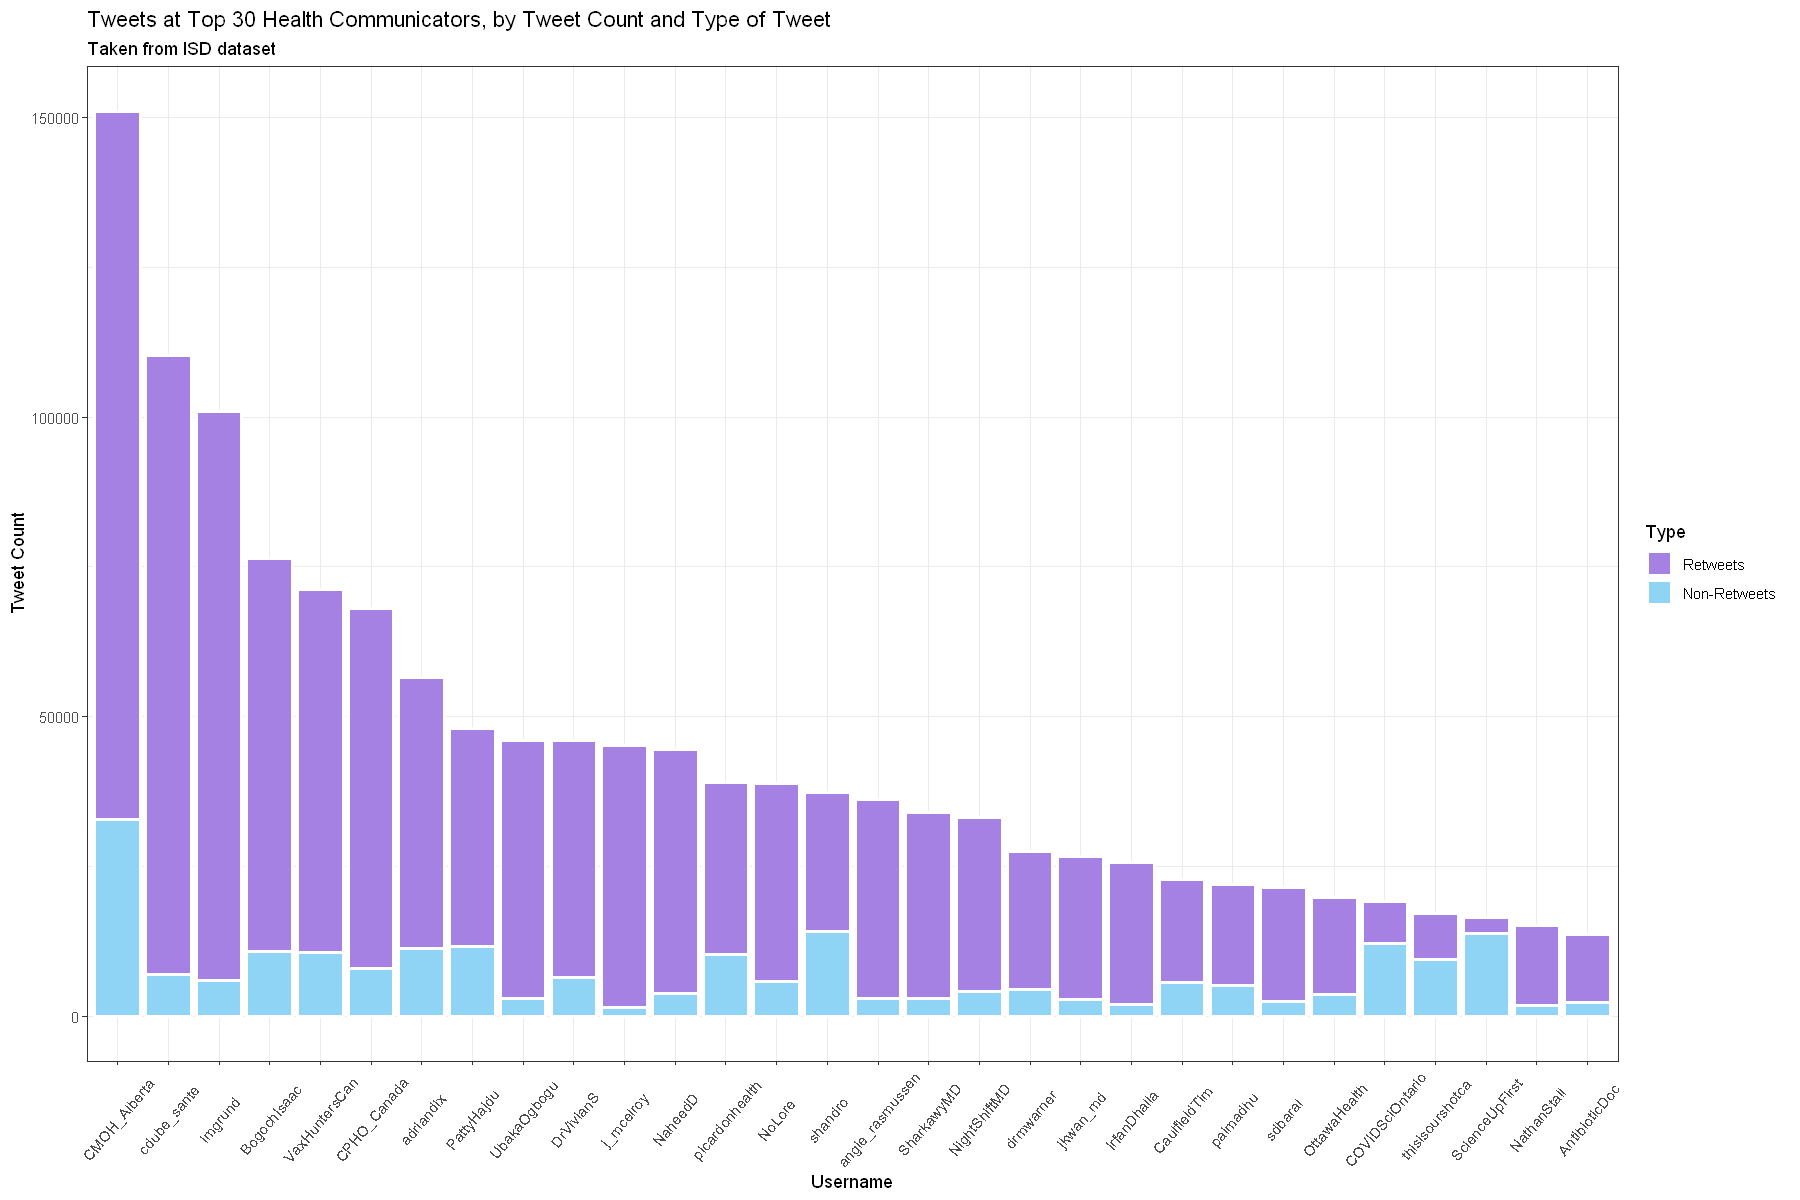

In [23]:
options(repr.plot.width = 15, repr.plot.height = 10)
graph_count <- tweet_counts_long |>
    ggplot(aes(x = user, y = Count, fill = Type)) +
    geom_bar(stat = "identity", color = "white", size = 1) +
    theme_bw() +
    theme(axis.text.x = element_text(angle = 50, vjust = 0.5)) +
    ggtitle("Tweets at Top 30 Health Communicators, by Tweet Count and Type of Tweet") +
    labs(x = "Username", y = "Tweet Count", subtitle = "Taken from ISD dataset") +
    scale_fill_manual(values = c("RT_Count" = "#8fd3f5", "Non_RT_Count" = "#a581e4"), 
                      labels = c("Retweets", "Non-Retweets"))
graph_count
ggsave("ISD_tweet_counts.png", width=10, height=6)